[2024-09-02 12:25:38,563][log.log][INFO] 
Executing select_data_query
Args: ('stock_price', "stock_id ='0050' ORDER BY Date DESC LIMIT 500")
Kwargs: {}
Return: SELECT stock_id, Close, Open, High, Low, Volume, Date FROM stock_price WHERE stock_id ='0050' ORDER BY Date DESC LIMIT 500;

[2024-09-02 12:25:38,627][log.log][INFO] Query execution time: 0.023083925247192383 seconds.


<Axes: xlabel='Date'>

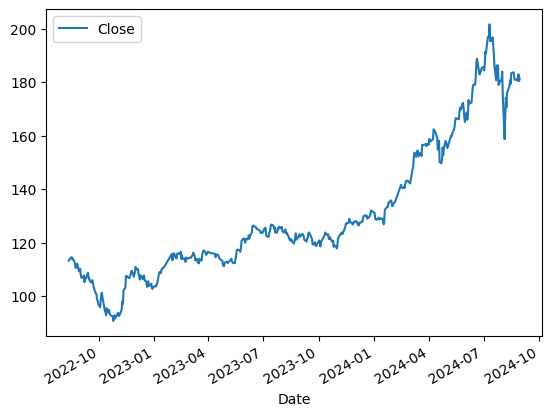

In [1]:
import pandas as pd
import numpy as np
import module_import
from src.quant_analysis.module_import import ETF_0050
df = ETF_0050()
df.plot()

In [2]:
dr = df.pct_change(1)
r = dr.add(1).cumprod()
dd = r.div(r.cummax()).sub(1)

In [3]:
mdd = dd.min()
end = dd.idxmin()
start = r.loc[:end[0]].idxmax()
days = end - start
days

/tmp/ipykernel_16609/3973629744.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = r.loc[:end[0]].idxmax()


Close   25 days
dtype: timedelta64[ns]

In [5]:
def MDD(df: pd.DataFrame):
    dr = df.pct_change(1)
    r = dr.add(1).cumprod()
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
    end = dd.idxmin()
    start = r.loc[:end[0]].idxmax()
    days = end - start
    return mdd[0], start[0], end[0], days[0]
MDD(df)

/tmp/ipykernel_16609/3904061653.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  start = r.loc[:end[0]].idxmax()
/tmp/ipykernel_16609/3904061653.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return mdd[0], start[0], end[0], days[0]


(-0.2130141434371574,
 Timestamp('2024-07-11 00:00:00'),
 Timestamp('2024-08-05 00:00:00'),
 Timedelta('25 days 00:00:00'))